# Recursive Binary Search Tree (rBST)

A recursive binary search tree is a data structure that allows recursively ask if certain value is in the tree.

In [7]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if new_node.value == temp.value:
                return False
            if new_node.value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else: 
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right

    def contains(self, value):
        temp = self.root
        while (temp is not None):
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False


    def __r_contains(self, current_node, value):
        """
        Recursive method that asks, by selecting values > or <, if the required value is there.
        In case there are no more nodes to ask (None) it returns False, otherwise, it will eventually find the required Node.
        Then it will return True.
        """
        if current_node == None: 
            return False      
        if value == current_node.value:
            return True 
        if value < current_node.value:
            return self.__r_contains(current_node.left, value) 
        if value > current_node.value:
            return self.__r_contains(current_node.right, value)
        


    def r_contains(self, value):
        """
        Interface method thas makes uses of the recursion
        """
        return self.__r_contains(self.root, value)
    

    def __r_insert(self, current_node, value):
        """
        Recursive method for insert a new node into a BST.
        This method makes use of the > or < logic to loop through the tree and put the new node in the correct position.
        """
        if current_node == None:
            return Node(value)
        
        if value < current_node.value:
            current_node.left = self.__r_insert(current_node.left, value)
        if value > current_node.value:
            current_node.right = self.__r_insert(current_node.right, value)
        return current_node
    

    def r_insert(self, value):
        if self.root == None: # In case there's a empty rBST
            self.root = Node(value)
        
        self.__r_insert(self.root, value) # calls the recursive method


        

    


In [5]:
# <!--------- CODE TO TEST [CONTAINS] METHOD ----------->

my_tree = BinarySearchTree()
my_tree.insert(47)
my_tree.insert(21)
my_tree.insert(76)
my_tree.insert(18)
my_tree.insert(27)
my_tree.insert(52)
my_tree.insert(82)

print('BST Contains 27:')
print(my_tree.r_contains(27))

print('\nBST Contains 17:')
print(my_tree.r_contains(17))
                

print('\nBST Contains 1:')
print(my_tree.r_contains(1))


print('\nBST Contains 21:')
print(my_tree.r_contains(21))
                

BST Contains 27:
True

BST Contains 17:
False

BST Contains 1:
False

BST Contains 21:
True


In [13]:
# <!--------- CODE TO TEST [INSERT] METHOD ----------->

my_tree = BinarySearchTree()
my_tree.r_insert(50)

my_tree.r_insert(25)
my_tree.r_insert(75)

my_tree.r_insert(10)
my_tree.r_insert(90)


print(f'root: {my_tree.root.value}')
print(f'root -> left: {my_tree.root.left.value}')
print(f'root -> right: {my_tree.root.right.value}')

print(f'root -> left -> left: {my_tree.root.left.left.value}')
print(f'root -> right -> right: {my_tree.root.right.right.value}')

root: 50
root -> left: 25
root -> right: 75
root -> left -> left: 10
root -> right -> right: 90


## Deleting a node in a rBST

For deleting a node using rBST, in case the required node to be deleted is a leaf or root-without childs, is the simpliest case scenario, just erase it at one shot.

Other case is if the node required to be deleted has two childs that also has childs, in that case, we will look at the right division of the required to be deleted node and look for the minimum value, once found, we will copy that value in the required to be deleted node and then erase from the tree the original node that the value was copied from.

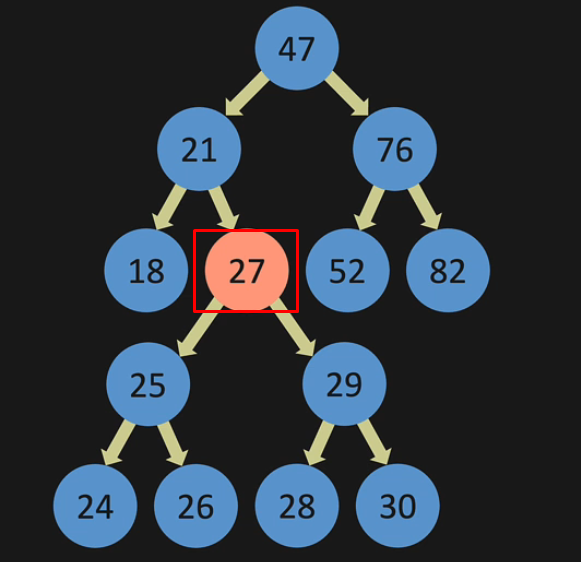
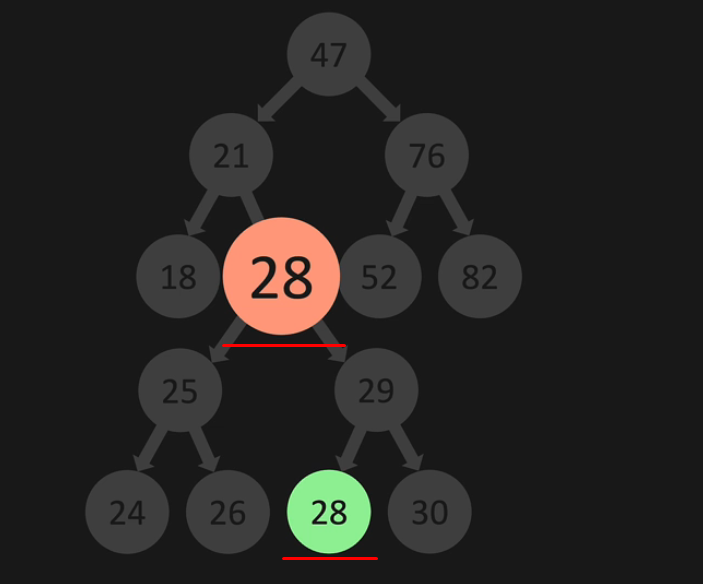

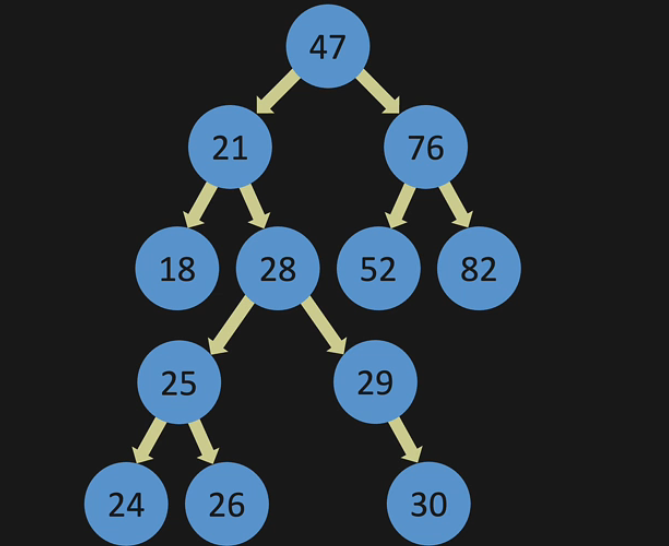


<b>In order to accomplish the delete process we will program again the class but implementing helpers and methods to find minimun value and delete the node. </b>


In [21]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if new_node.value == temp.value:
                return False
            if new_node.value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else: 
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right

    def contains(self, value):
        temp = self.root
        while (temp is not None):
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False


    def __r_contains(self, current_node, value):
        """
        Recursive method that asks, by selecting values > or <, if the required value is there.
        In case there are no more nodes to ask (None) it returns False, otherwise, it will eventually find the required Node.
        Then it will return True.
        """
        if current_node == None: 
            return False      
        if value == current_node.value:
            return True 
        if value < current_node.value:
            return self.__r_contains(current_node.left, value) 
        if value > current_node.value:
            return self.__r_contains(current_node.right, value)
        


    def r_contains(self, value):
        """
        Interface method thas makes uses of the recursion
        """
        return self.__r_contains(self.root, value)
    

    def __r_insert(self, current_node, value):
        """
        Recursive method for insert a new node into a BST.
        This method makes use of the > or < logic to loop through the tree and put the new node in the correct position.
        """
        if current_node == None:
            return Node(value)
        
        if value < current_node.value:
            current_node.left = self.__r_insert(current_node.left, value)
        if value > current_node.value:
            current_node.right = self.__r_insert(current_node.right, value)
        return current_node
    

    def r_insert(self, value):
        if self.root == None: # In case there's a empty rBST
            self.root = Node(value)
        
        self.__r_insert(self.root, value) # calls the recursive method


        
    def min_value(self, current_node):
        while current_node.left is not None:
            current_node = current_node.left
        
        return current_node.value
    

    def __delete_node(self, current_node, value):
        if current_node == None: 
            return None

        if value < current_node.value:
            current_node.left = self.__delete_node(current_node.left, value)
        elif value > current_node.value: 
            current_node.right = self.__delete_node(current_node.right, value)
        else:
            if current_node.left == None and current_node.right == None:
                return None
            elif current_node.left == None:
                current_node = current_node.right
            elif current_node.right == None:
                current_node = current_node.left
            else:
                sub_tree_min = self.min_value(current_node.right)
                current_node.value = sub_tree_min
                current_node.right = self.__delete_node(current_node.right, sub_tree_min)

        return current_node

    def delete_node(self, value):
        self.root = self.__delete_node(self.root, value)


In [19]:
my_tree = BinarySearchTree()

my_tree.insert(50)
my_tree.insert(21)
my_tree.insert(76)

my_tree.insert(18)
my_tree.insert(27)
my_tree.insert(52)
my_tree.insert(82)


print(my_tree.min_value(my_tree.root)) # finding the min value of the whole tree
print(my_tree.min_value(my_tree.root.right)) # finding the min value of the right branch from the root


18
52


In [24]:


my_tree = BinarySearchTree()
my_tree.r_insert(2)
my_tree.r_insert(1)
my_tree.r_insert(3)



print("root:", my_tree.root.value)
print("root.left =", my_tree.root.left.value)
print("root.right =", my_tree.root.right.value)


my_tree.delete_node(2)


print("\nroot:", my_tree.root.value)
print("root.left =", my_tree.root.left.value)
print("root.right =", my_tree.root.right)


root: 2
root.left = 1
root.right = 3

root: 3
root.left = 1
root.right = None
